<a href="https://colab.research.google.com/github/hyunicecream/ML-DL/blob/main/LSTM%20%EC%82%BC%EC%84%B1%EC%A0%84%EC%9E%90%20%EC%A3%BC%EA%B0%80%20%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense, Input, LSTM
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

In [ ]:
data = pd.read_csv('삼성전자.csv')
data.head()

/content/drive/MyDrive/Private_room/data


,날짜,종가,전일비,등락율,거래량,개인,기관,외국인,금융투자,보험,투신,은행,기타금융,연기금,사모펀드,국가지자체,기타법인,기타외국인,개인누적,기관누적,외국인누적,금투누적,투신누적,연기금누적
0,2020.6.1,51200,500,NaN,16289568,-1859511,2104912,-39405,795040,274522,93773,17922,-34554,921107,37102,0,-190526,-15470,-1859511,2104912,-39405,795040,93773,921107
1,2020.6.2,51400,200,0.003906,13764485,-560690,873157,-357253,81149,568419,48140,7572,-1260,108237,60900,0,24180,20606,-2420201,2978069,-396658,876189,141913,1029344
2,2020.6.3,54500,3100,0.060311,48817627,-12644642,9757786,3271861,6464027,1568929,1297994,-54218,-28639,42381,467312,0,-354941,-30064,-15064843,12735855,2875203,7340216,1439907,1071725
3,2020.6.4,54600,100,0.001835,40088343,-3179569,1604890,1678893,2894351,-297073,279363,-9337,28892,-1572203,280897,0,-70151,-34063,-18244412,14340745,4554096,10234567,1719270,-500478
4,2020.6.5,55500,900,0.016484,22402378,-2638431,2869587,-184385,2291970,108763,1044160,6651,-18200,-525779,-37978,0,-25417,-21354,-20882843,17210332,4369711,12526537,2763430,-1026257


In [ ]:
data['종가'].tail()

247    81800
248    80900
249    80500
250    79900
251    80000
Name: 종가, dtype: int64

In [ ]:
# 예상주가 예측
last_price = list(data['종가'])[-1]
last_price

80000

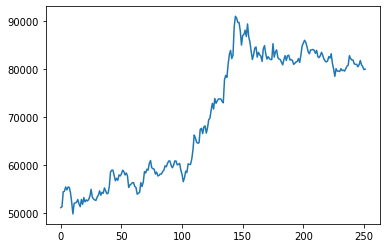

In [ ]:
# 주가 차크를 확인해 본다.
plt.plot(data['종가'])
plt.show()

In [ ]:
# 결측치 제거
df = data.dropna()

In [ ]:
# 필요없는 데이터 삭제
df = df.drop(['날짜', '종가', '전일비', '거래량', '개인누적', '기관누적', '외국인누적', '금투누적', '투신누적', '연기금누적', '국가지자체'], axis=1)
df.head()

,등락율,개인,기관,외국인,금융투자,보험,투신,은행,기타금융,연기금,사모펀드,기타법인,기타외국인
1,0.003906,-560690,873157,-357253,81149,568419,48140,7572,-1260,108237,60900,24180,20606
2,0.060311,-12644642,9757786,3271861,6464027,1568929,1297994,-54218,-28639,42381,467312,-354941,-30064
3,0.001835,-3179569,1604890,1678893,2894351,-297073,279363,-9337,28892,-1572203,280897,-70151,-34063
4,0.016484,-2638431,2869587,-184385,2291970,108763,1044160,6651,-18200,-525779,-37978,-25417,-21354
5,-0.010811,2852709,-1098871,-1650246,-723060,-67082,728799,32155,53610,-1144027,20734,-121115,17523


In [ ]:
# feature 표준화
rtn_mean = df['등락율'].mean()
rtn_std = df['등락율'].std()
# 표준화
df = (df - df.mean() / df.std())

In [ ]:
# 2차원 배열의 feature 데이터로 LSTM 학습 데이터를 만든다.
def build_train_data(data, t_step, n_jump = 1):
    n_data = data.shape[0]   # number of data
    n_feat = data.shape[1]   # number of features

    m = np.arange(0, n_data - t_step, n_jump)   # m =  [0, 1, 2, 3, 4, 5]
    x = [data[i:(i+t_step), :] for i in m]      # feature data
    y = [data[i, :] for i in (m + t_step)]      # target data

    # shape을 조정한다. feature = 3D, target = 2D
    x_data = np.reshape(np.array(x), (len(m), t_step, n_feat))
    y_target = np.reshape(np.array(y), (len(m), n_feat))
    
    return x_data, y_target

In [ ]:
t_step = 20
# 학습 데이터를 생성한다. 
x_train, y_train = build_train_data(np.array(df), t_step, n_jump=1)
x_train.shape, y_train.shape

((231, 20, 13), (231, 13))

In [ ]:
n_feat = x_train.shape[2]
n_output = y_train.shape[1]
n_hidden = 128

# LSTM 모델을 생성한다.
x_input = Input(batch_shape=(None, t_step, n_feat))
x_lstm = LSTM(n_hidden, return_sequences=True)(x_input)
x_lstm = LSTM(n_hidden, dropout=0.2)(x_lstm) # 내부가 네트워크이기때문에 내부에 dropout을 써준다

y_output = Dense(n_output)(x_lstm)

model = Model(x_input, y_output)
model.compile(loss='mse', optimizer=Adam(learning_rate=0.001))
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 20, 13)]          0         
                                                                 
 lstm_2 (LSTM)               (None, 20, 128)           72704     
                                                                 
 lstm_3 (LSTM)               (None, 128)               131584    
                                                                 
 dense_1 (Dense)             (None, 13)                1677      
                                                                 
Total params: 205,965
Trainable params: 205,965
Non-trainable params: 0
_________________________________________________________________


In [ ]:
y_train.shape

(231, 13)

In [ ]:
h = model.fit(x_train, y_train, epochs=100, batch_size=32, shuffle=True)

Epoch 1/100
8/8 [==============================] - 5s 59ms/step - loss: 3503111798784.0000
Epoch 2/100
8/8 [==============================] - 0s 59ms/step - loss: 3503110488064.0000
Epoch 3/100
8/8 [==============================] - 0s 61ms/step - loss: 3503109177344.0000
Epoch 4/100
8/8 [==============================] - 0s 58ms/step - loss: 3503108390912.0000
Epoch 5/100
8/8 [==============================] - 0s 60ms/step - loss: 3503107080192.0000
Epoch 6/100
8/8 [==============================] - 0s 60ms/step - loss: 3503106555904.0000
Epoch 7/100
8/8 [==============================] - 1s 64ms/step - loss: 3503105769472.0000
Epoch 8/100
8/8 [==============================] - 1s 64ms/step - loss: 3503105245184.0000
Epoch 9/100
8/8 [==============================] - 1s 64ms/step - loss: 3503104196608.0000
Epoch 10/100
8/8 [==============================] - 0s 60ms/step - loss: 3503103934464.0000
Epoch 11/100
8/8 [==============================] - 0s 58ms/step - loss: 3503103410176.00

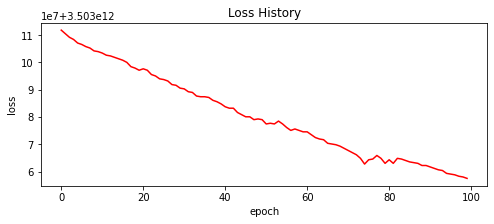

In [ ]:
# Loss history를 그린다
plt.figure(figsize=(8, 3))
plt.plot(h.history['loss'], color='red')
plt.title("Loss History")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

In [ ]:
# 내일의 수익률과 주가를 예측한다.
px = np.array(df.tail(20)).reshape(1, t_step, n_feat)
y_pred = model.predict(px)[0][0]
y_rtn = y_pred * rtn_std + rtn_mean

if y_rtn > 0:
  print("내일은 {:.2f}% 상승할 것으로 예측됩니다.".format(y_rtn * 100))
else:
  print("내일은 {:.2f}% 하락할 것으로 예측됩니다.".formant(y_ttn * 100))
print("예상 주가 = {:.0f}".format(last_price * (1 + y_rtn)))

내일은 0.01% 상승할 것으로 예측됩니다.
예상 주가 = 80010
